# Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

# Read data

In [6]:
house = pd.read_csv("/Users/gumber/Documents/Personal_Repository/AI-DataScience-Course/ML/data/Maison.csv")
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformation and Analysis

In [19]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [20]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [143]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   rooms      545 non-null    int64
 3   bathroom   545 non-null    int64
 4   floors     545 non-null    int64
 5   driveway   545 non-null    int64
 6   game_room  545 non-null    int64
 7   cellar     545 non-null    int64
 8   gas        545 non-null    int64
 9   air        545 non-null    int64
 10  garage     545 non-null    int64
 11  situation  545 non-null    int64
dtypes: int64(12)
memory usage: 55.4+ KB


In [21]:
house.corr()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
area,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
rooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathroom,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
floors,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
game_room,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
cellar,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gas,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
air,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626


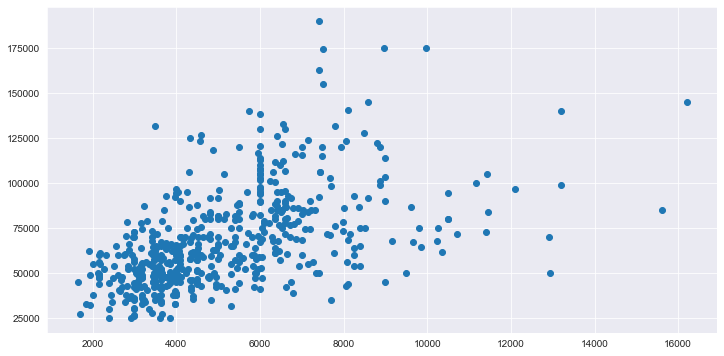

In [23]:
# Plotting the graph with most correlated independent variables
plt.scatter(house['area'], house['price'])
plt.show()

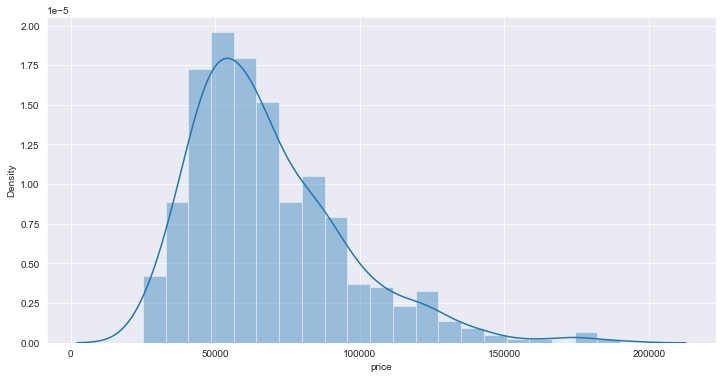

In [25]:
sns.distplot(house['price'])
plt.show()

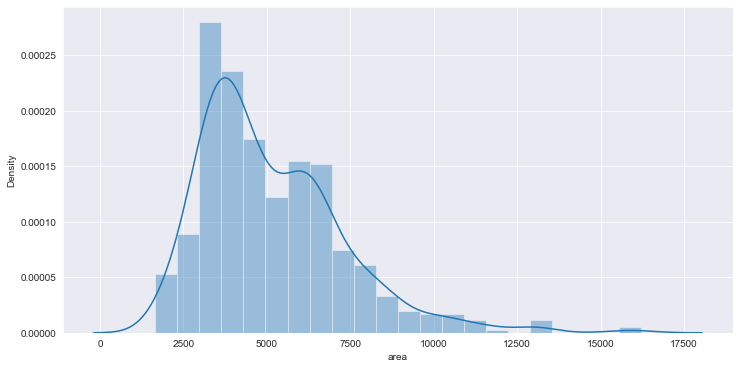

In [27]:
sns.distplot(house['area'])
plt.show()

In [96]:
#  EDA
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [95]:
# Check missing values per column
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

In [99]:
house['air'].value_counts()

0    373
1    173
Name: air, dtype: int64

In [102]:
house['garage'].value_counts()

0    300
1    126
2    108
3     12
Name: garage, dtype: int64

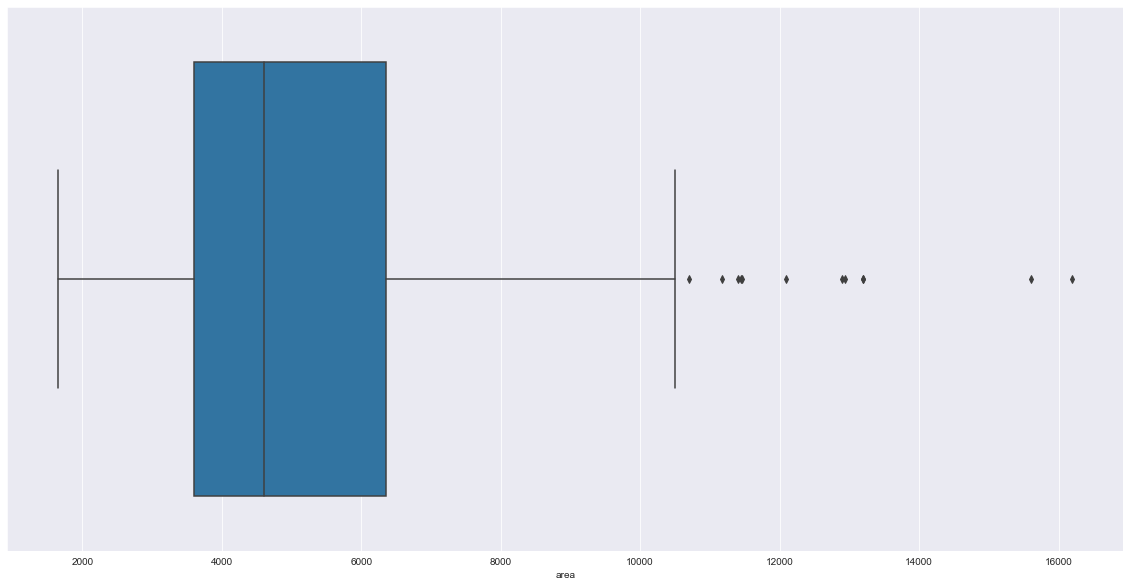

In [104]:
# Checking outliers
fig = plt.figure(figsize=(20,10))
sns.boxplot(house['area'])
plt.show()

In [144]:
# Remove outliers greater than 12000
house.drop(house.loc[house['area'] > 12000].index, inplace=True)

In [117]:
# Remove duplicated rows
house.drop_duplicates(inplace=True)

In [146]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


<AxesSubplot:xlabel='situation'>

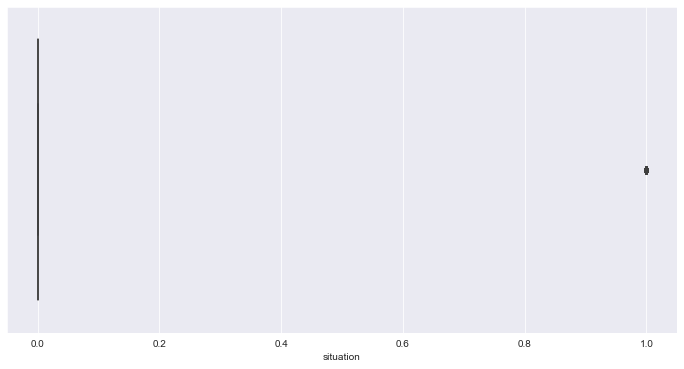

In [149]:
sns.boxplot(house['situation'])

<AxesSubplot:xlabel='game_room'>

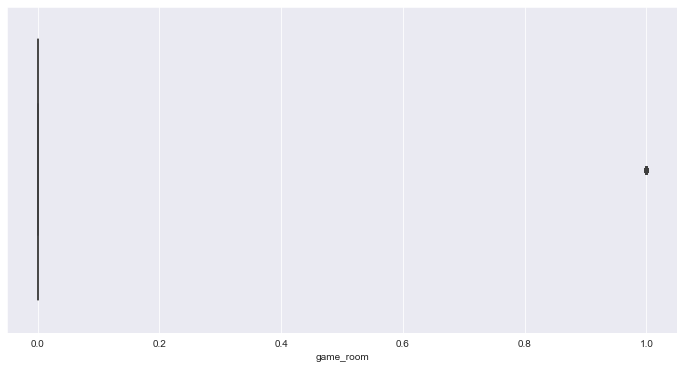

In [152]:
sns.boxplot(house['game_room'])

In [153]:
# Remove columns game_room and situation
house.drop(columns=['game_room', 'situation'], inplace=True)

In [142]:
house['gas'].var()

0.04384781435509983

In [154]:
# import libraries related to LInearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
lm = LinearRegression()

In [155]:
X = house.drop(['price'], axis=1).values
y = house['price'].values

In [156]:
# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
lm.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred = lm.predict(X_test)
y_pred

array([ 52573.46946356,  45502.96832271,  58488.80524615,  67849.77822104,
        50955.50600041,  74099.4313376 , 101579.74650605, 108081.05333541,
        49390.964872  ,  78242.28471208,  82293.01201952,  60565.53451572,
        94725.17677462,  32442.2154877 ,  40693.37382603,  93909.0236716 ,
        87595.27450741,  85640.30960773,  47509.2283269 ,  41160.79673683,
        92777.58131295,  85162.01023857,  83790.77688272,  61620.89807765,
        58291.04972772,  41043.70433046,  65770.97578813,  72118.93001426,
       105832.65798162,  67916.13007392,  92397.91130871,  84479.44017918,
        74393.46229359,  75332.61801102,  79753.97758136,  42640.9692877 ,
        51287.32684387,  35437.48370057,  79495.23706008,  63532.3853271 ,
        55844.46354551,  72978.17889715,  77649.18232308,  57469.09441033,
        61629.05874535,  79473.80197034,  45879.89455825,  40615.47000757,
        88124.05471743,  41919.08139701,  54191.53982388,  70699.29994737,
        32128.6410787 , 1

In [160]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [7557.84759285 1515.99458334 6632.22583134 5858.05346869 3175.91394026
 4914.41278073 3006.17792646 6272.30202352 3306.16956691]
Mean squared error: 261389002.74


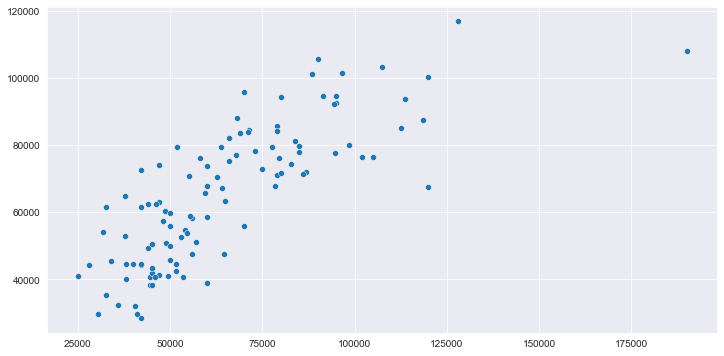

In [161]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, y_pred)
plt.show()

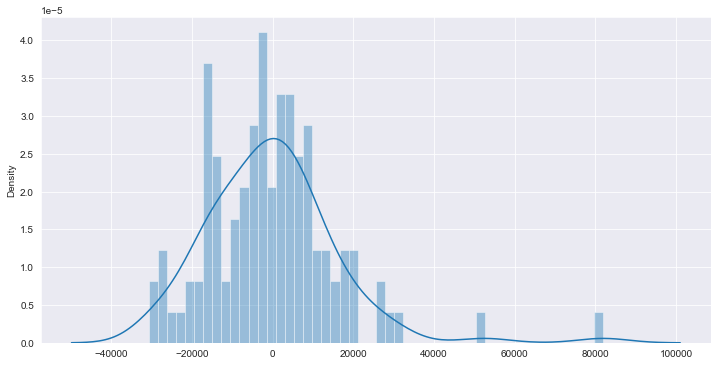

In [162]:
# Residual histigram
sns.distplot((y_test - y_pred), bins=50);

# Using OLS

In [163]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [164]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X)

In [165]:
res = sm.OLS(y, X_endog)
results = res.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sat, 29 May 2021   Prob (F-statistic):          1.34e-112
Time:                        15:58:38   Log-Likelihood:                -5962.4
No. Observations:                 538   AIC:                         1.194e+04
Df Residuals:                     528   BIC:                         1.199e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.771e+04    684.748     98.879      0.0

In [166]:
# Extract the parametrs
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [67707.23420074  8229.09089643  1439.92702745  7026.43028758
  5767.17403594  2868.22908226  3936.48568131  2485.52573177
  6040.85986837  3457.97058568]
R2:  0.6446698132699663
